In [1]:
%load_ext autoreload
%autoreload 2

# Example Run of the Mark-0 COVID Model

The model is that of Sharma et al. (2020) [_V-, U-, L-, or W-shaped recovery after COVID? Insights from an Agent Based Model_](https://doi.org/10.1371/journal.pone.0247823).

In [2]:
from mark0_covid import Mark0_COVID

from matplotlib import pyplot as plt


In [3]:
model = Mark0_COVID()

default_params = model.parameters
t_end = 2000
cutoff = 500

/home/karl/Dropbox/EconophysiX/project_mark0/mark0_covid.py:331: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  parameter = yaml.load(f)
/home/karl/Dropbox/EconophysiX/project_mark0/mark0_covid.py:328: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  parameter = yaml.load(f)


In [4]:
# Default parameters correspond to full employment
fe = model.simulate(t_end=t_end)

In [5]:
# Also add some of the other phases for 
model.parameters['rho_star'] = 0.02
ru = model.simulate(t_end=t_end)

In [6]:
# Endogenous crises phase
model.parameters = default_params
model.parameters['rho_star'] = 0.08
model.parameters['theta'] = 5.0
ec = model.simulate(t_end=t_end)

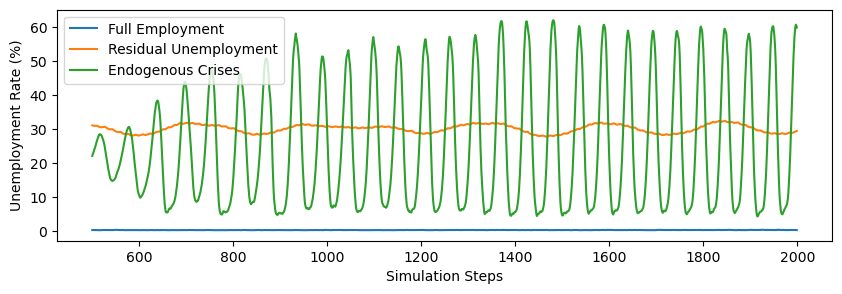

In [7]:
# Comparison by means of the unemployment rate
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_ylabel('Unemployment Rate (%)')
ax.set_xlabel('Simulation Steps')
ax.plot(100 * fe.u.iloc[cutoff:], label='Full Employment')
ax.plot(100 * ru.u.iloc[cutoff:], label='Residual Unemployment')
ax.plot(100 * ec.u.iloc[cutoff:], label='Endogenous Crises')
ax.legend()
plt.show()